In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/Users/patrickk/Desktop/competition/training_data.csv")
y_train = data.iloc[:,15].values
data.head(10)

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,27642,42,Private,86185,Some-college,10,Widowed,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,0
1,19774,27,Private,136448,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,0
2,19569,35,Private,166193,HS-grad,9,Divorced,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,0
3,18186,28,Private,177119,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,80,?,0
4,2013,41,Self-emp-not-inc,174395,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,1
5,17834,46,Private,94809,Some-college,10,Divorced,Priv-house-serv,Unmarried,White,Female,0,0,30,United-States,0
6,17642,24,State-gov,38151,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,12,United-States,0
7,23568,48,Private,192161,Bachelors,13,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,43,United-States,0
8,5989,27,Self-emp-not-inc,208406,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,1
9,1778,69,Private,182862,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,15831,0,40,United-States,1


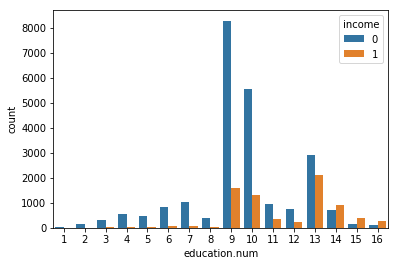

In [81]:
sns.countplot(data['education.num'], hue = data['income'])

/Users/patrickk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/patrickk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


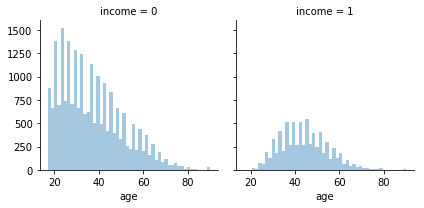

In [82]:
g = sns.FacetGrid(data, col = 'income')
g.map(sns.distplot, 'age', kde = False)

In [83]:
data.drop(data.columns[[0]], axis=1, inplace=True)
X_train = data.drop("income", axis = 1)
# X_train = data.iloc[:,[3]]
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,42,Private,86185,Some-college,10,Widowed,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States
1,27,Private,136448,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States
2,35,Private,166193,HS-grad,9,Divorced,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
3,28,Private,177119,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,80,?
4,41,Self-emp-not-inc,174395,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States


In [84]:
def classify_edu (num):
    return int(num/9)
X_train['edu_classified'] = X_train['education.num'].apply(classify_edu)
# def classify_edu4 (num):
#     return int((num+1)/4)
# X_train['edu_classified4'] = X_train['education.num'].apply(classify_edu4)
def classify_age10(age):
    return int(age/10)
X_train['age_classified10'] = X_train['age'].apply(classify_age10)
def classify_age20(age):
    return int(age/20)
X_train['age_classified20'] = X_train['age'].apply(classify_age20)
def classify_age30(age):
    return int(age/30)
X_train['age_classified30'] = X_train['age'].apply(classify_age30)
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,edu_classified,edu_classified4,age_classified10,age_classified20,age_classified30
0,42,Private,86185,Some-college,10,Widowed,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,1,2,4,2,1
1,27,Private,136448,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,1,3,2,1,0
2,35,Private,166193,HS-grad,9,Divorced,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,1,2,3,1,1
3,28,Private,177119,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,80,?,1,3,2,1,0
4,41,Self-emp-not-inc,174395,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,1,4,4,2,1


In [85]:


### fill native.country
# X_train['native.country'] = X_train['native.country'].replace('?', np.nan)
# str = X_train['native.country'].mode().values[0]
# X_train['native.country']= X_train['native.country'].fillna(str)
# ### fill workclass
# X_train['workclass'] = X_train['workclass'].replace('?', np.nan)
# str = X_train['workclass'].mode().values[0]
# X_train['workclass']= X_train['workclass'].fillna(str)
### fill occupation
# X_train['occupation'] = X_train['occupation'].replace('?', np.nan)
# str = X_train['occupation'].mode().values[0]
# X_train['occupation']= X_train['occupation'].fillna(str)

print(X_train.head())
X_train = X_train.values

   age         workclass  fnlwgt     education  education.num  \
0   42           Private   86185  Some-college             10   
1   27           Private  136448     Bachelors             13   
2   35           Private  166193       HS-grad              9   
3   28           Private  177119       Masters             14   
4   41  Self-emp-not-inc  174395     Doctorate             16   

       marital.status         occupation   relationship                race  \
0             Widowed    Exec-managerial  Not-in-family  Amer-Indian-Eskimo   
1       Never-married       Adm-clerical  Not-in-family               Black   
2            Divorced  Machine-op-inspct      Own-child               White   
3       Never-married    Exec-managerial  Not-in-family               White   
4  Married-civ-spouse     Prof-specialty        Husband               White   

      sex  capital.gain  capital.loss  hours.per.week native.country  \
0  Female             0             0              40  United-

In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
X_train[:, 1] = le1.fit_transform(X_train[:, 1])
X_train[:, 3] = le2.fit_transform(X_train[:, 3])
X_train[:, 5] = le3.fit_transform(X_train[:, 5])
X_train[:, 6] = le4.fit_transform(X_train[:, 6])
X_train[:, 7] = le5.fit_transform(X_train[:, 7])
X_train[:, 8] = le6.fit_transform(X_train[:, 8])
X_train[:, 9] = le7.fit_transform(X_train[:, 9])
X_train[:, 13] = le8.fit_transform(X_train[:, 13])

In [87]:
# ohe1 = OneHotEncoder(categorical_features = [1])
# X_train= ohe1.fit_transform(X_train).toarray()
# X_train= X_train[:, 1:]

# ohe2 = OneHotEncoder(categorical_features = [3])
# X_train= ohe2.fit_transform(X_train).toarray()
# X_train= X_train[:, 1:]

# ohe3 = OneHotEncoder(categorical_features = [5])
# X_train= ohe3.fit_transform(X_train).toarray()
# X_train= X_train[:, 1:]

# ohe4 = OneHotEncoder(categorical_features = [6])
# X_train= ohe4.fit_transform(X_train).toarray()
# X_train= X_train[:, 1:]

# ohe5 = OneHotEncoder(categorical_features = [7])
# X_train= ohe5.fit_transform(X_train).toarray()
# X_train= X_train[:, 1:]

# ohe6 = OneHotEncoder(categorical_features = [8])
# X_train= ohe6.fit_transform(X_train).toarray()
# X_train= X_train[:, 1:]

# ohe7 = OneHotEncoder(categorical_features = [9])
# X_train= ohe7.fit_transform(X_train).toarray()
# X_train= X_train[:, 1:]

# ohe8 = OneHotEncoder(categorical_features = [13])
# X_train= ohe8.fit_transform(X_train).toarray()
# X_train= X_train[:, 1:]

In [88]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
from sklearn.svm import SVC
classifier= SVC()
classifier.fit(X_train, y_train)
##### train finish

/Users/patrickk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/patrickk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
test_data = pd.read_csv("/Users/patrickk/Desktop/competition/testing_data.csv")
X_test = test_data.drop(test_data.columns[[0]], axis=1)

# X_test = test_data.iloc[:,[3]]

## fill native.country
# X_test['native.country'] = X_test['native.country'].replace('?', np.nan)
# str = X_test['native.country'].mode().values[0]
# X_test['native.country']= X_test['native.country'].fillna(str)
# ## fill workclass
# X_test['workclass'] = X_test['workclass'].replace('?', np.nan)
# str = X_test['workclass'].mode().values[0]
# X_test['workclass']= X_test['workclass'].fillna(str)
## fill occupation
# X_test['occupation'] = X_test['occupation'].replace('?', np.nan)
# str = X_test['occupation'].mode().values[0]
# X_test['occupation']= X_test['occupation'].fillna(str)
X_test['edu_classified'] = X_test['education.num'].apply(classify_edu)
# X_test['edu_classified4'] = X_test['education.num'].apply(classify_edu4)
X_test['age_classified10'] = X_test['age'].apply(classify_age10)
X_test['age_classified20'] = X_test['age'].apply(classify_age20)
X_test['age_classified30'] = X_test['age'].apply(classify_age30)
X_test = X_test.values

X_test[:, 1] = le1.transform(X_test[:, 1])
X_test[:, 3] = le2.transform(X_test[:, 3])
X_test[:, 5] = le3.transform(X_test[:, 5])
X_test[:, 6] = le4.transform(X_test[:, 6])
X_test[:, 7] = le5.transform(X_test[:, 7])
X_test[:, 8] = le6.transform(X_test[:, 8])
X_test[:, 9] = le7.transform(X_test[:, 9])
X_test[:, 13] = le8.transform(X_test[:, 13])

# X_test= ohe1.transform(X_test).toarray()
# X_test= X_test[:, 1:]
# X_test= ohe2.transform(X_test).toarray()
# X_test= X_test[:, 1:]
# X_test= ohe3.transform(X_test).toarray()
# X_test= X_test[:, 1:]
# X_test= ohe4.transform(X_test).toarray()
# X_test= X_test[:, 1:]
# X_test= ohe5.transform(X_test).toarray()
# X_test= X_test[:, 1:]
# X_test= ohe6.transform(X_test).toarray()
# X_test= X_test[:, 1:]
# X_test= ohe7.transform(X_test).toarray()
# X_test= X_test[:, 1:]
# X_test= ohe8.transform(X_test).toarray()
# X_test= X_test[:, 1:]

X_test= sc.fit_transform(X_test)
y_pred= classifier.predict(X_test)
y_pred.shape
get_id = pd.read_csv("/Users/patrickk/Desktop/competition/testing_data.csv")
pred_id = get_id.iloc[:, 0].values
pred_id = np.reshape(pred_id, (2000, 1))
y_pred= np.reshape(y_pred, (2000, 1))
result = np.hstack((pred_id, y_pred))
result= pd.DataFrame(result)
result.columns=["id", "income"]
result.to_csv('pred_svm.csv', index = False)

/Users/patrickk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/patrickk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

rfc_pred = random_forest.predict(X_test)

rfc_pred = np.reshape(rfc_pred, (2000, 1))
rfc_output = np.hstack((pred_id, rfc_pred))
rfc_output = pd.DataFrame(rfc_output)
rfc_output.columns=["id", "income"]
rfc_output.to_csv('pred_rfc.csv', index = False)

In [91]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred = np.reshape(lr_pred, (2000, 1))
lr_output = np.hstack((pred_id, lr_pred))
lr_output = pd.DataFrame(lr_output)
lr_output.columns=["id", "income"]
lr_output.to_csv('pred_lr.csv', index = False)